In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import zipfile
import io
zf = zipfile.ZipFile('/content/MancaNegara.zip', "r")
zf.extractall()

zf2 = zipfile.ZipFile('/content/Lokal.zip', "r")
zf2.extractall()


In [9]:
import pandas as pd

def merge_tables(types):
    """Merge tables from multiple sources into one master table.

    Args:
        types (string): Type of the tourists
    Returns:
        pd.DataFrame: Master dataframe
    """
    months = ['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']
    dfs = []
    if types == 'MancaNegara':
      for month in months:
        basepath = '/content/data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-'+month+'-tahun-2020.csv'
        dfs.append(pd.read_csv(basepath))
    elif types == 'Lokal':
      for month in months:
        basepath = '/content/Lokal/data-jumlah-kunjungan-wisatawan-nusantara-bulan-' + month + '-tahun-2020.csv'
        dfs.append(pd.read_csv(basepath))
    return pd.concat(dfs)

# Mancanegara

In [51]:
manca_merged_df = merge_tables('MancaNegara')
manca_merged_df.reset_index()
manca_merged_df = manca_merged_df.drop(['tahun'], axis = 1)
manca_merged_df

,bulan,destinasi_wisata,jumlah
0,1,Taman Impian Jaya Ancol,516
1,1,Taman Mini Indonesia Indah,0
2,1,Taman Margasatwa Ragunan,449
3,1,Monumen Nasional,2070
4,1,Museum Nasional,2877
...,...,...,...
15,12,PBB Setu babakan,0
16,12,Museum Prasasti,0
17,12,Planetarium,0
18,12,Rumah si Pitung,0


In [52]:
manca_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 19
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bulan             240 non-null    int64 
 1   destinasi_wisata  240 non-null    object
 2   jumlah            240 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.5+ KB


In [53]:
manca_merged_df.isnull().sum()

bulan               0
destinasi_wisata    0
jumlah              0
dtype: int64

Tidak terlihat adanya missing atau null values di dalam csv files

In [54]:
manca_merged_df['destinasi_wisata'].value_counts()

Museum Nasional                 12
Monumen Nasional                12
Museum Satria Mandala           12
Museum Bahari                   12
Museum Sejarah Jakarta          12
Planetarium                     12
Kepulauan Seribu                12
Museum Seni Rupa dan Keramik    12
Taman Arkeologi Onrust          12
Kawasan Kota Tua                12
Pelabuhan Sunda Kelapa          12
Rumah si Pitung                 12
Museum Joang                    12
Museum Wayang                   12
Taman Margasatwa Ragunan        12
Taman Impian Jaya Ancol         12
Taman Mini Indonesia Indah      12
Museum Tekstil                  12
Museum Prasasti                 12
PBB Setu babakan                12
Name: destinasi_wisata, dtype: int64

Setiap tempat destinasi memiliki catatan info yang sama selama 12 bulan

In [55]:
# merged_df.loc[merged_df['destinasi_wisata'] == 'Kawasan Kota Tua', :]

In [56]:
manca_groupby_df = merged_df.groupby(['bulan', 'destinasi_wisata'], as_index=False)['jumlah'].sum()

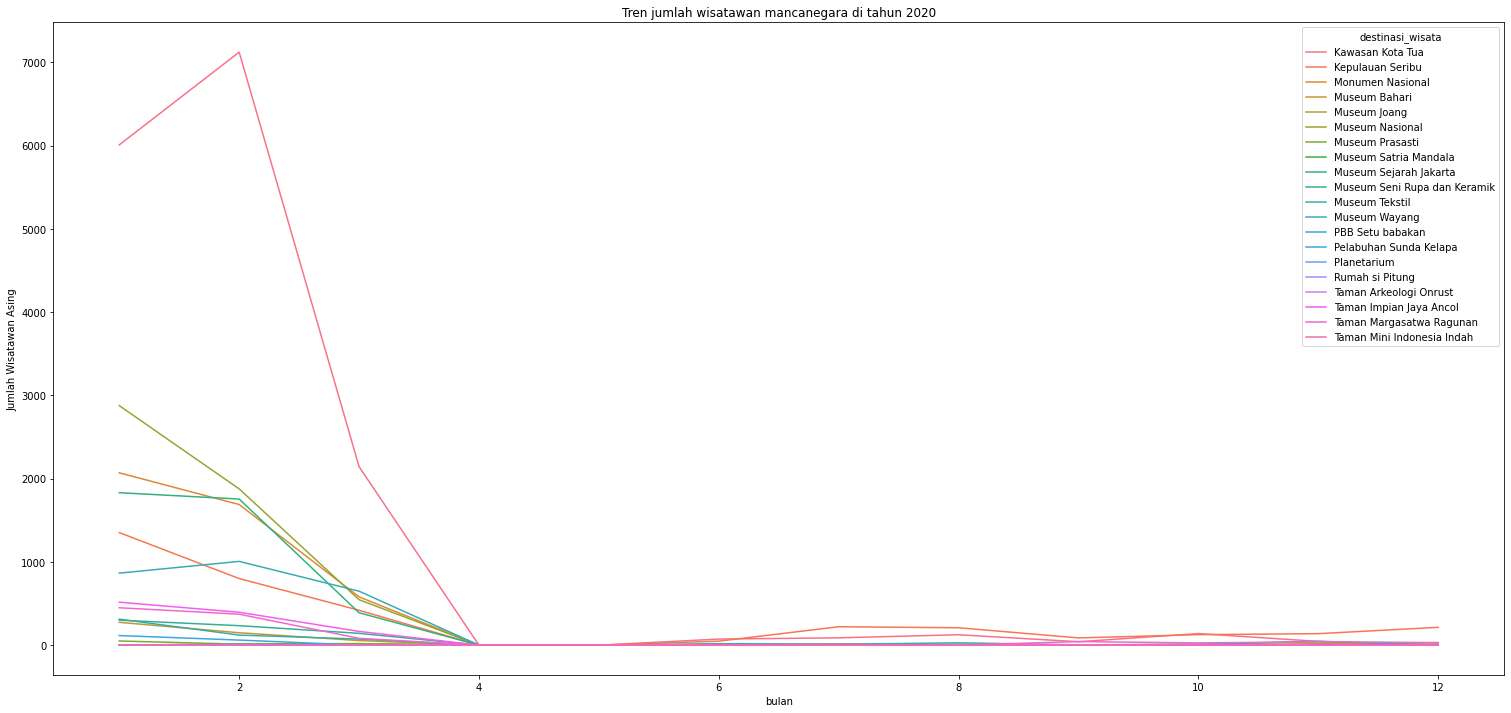

In [57]:
plt.figure(figsize=(26, 12))
sns.color_palette("bright")
sns.lineplot(data=manca_groupby_df, x='bulan', y='jumlah', hue='destinasi_wisata')
plt.title('Tren jumlah wisatawan mancanegara di tahun 2020')
plt.ylabel('Jumlah Wisatawan Asing')
plt.show()

Dari chart di atas, bisa dilihat bahwa **Kawasan Kota Tua** memiliki turis yang lebih tinggi pada 3 bulan pertama, maka dari itu untuk memperjelas chartnya, kita akan coba untuk membuang **Kawasan Kota Tua** untuk sementara dari chart

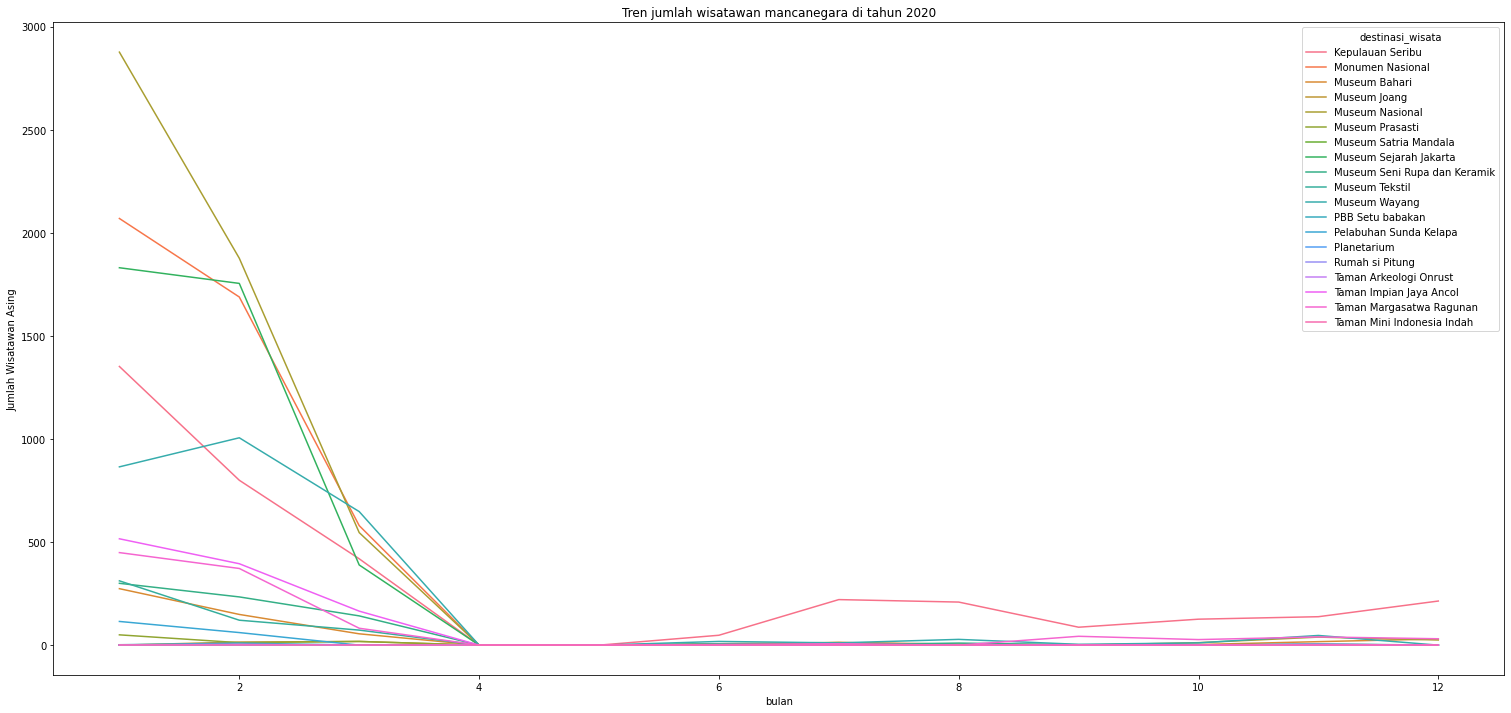

In [58]:
no_kotatua = manca_groupby_df[manca_groupby_df['destinasi_wisata'] != 'Kawasan Kota Tua']
plt.figure(figsize=(26, 12))
sns.color_palette("bright")
sns.lineplot(data=no_kotatua, x='bulan', y='jumlah', hue='destinasi_wisata')
plt.title('Tren jumlah wisatawan mancanegara di tahun 2020')
plt.ylabel('Jumlah Wisatawan Asing')
plt.show()

Sekarang chart tersebut bisa terlihat lebih jelas, dengan range jumlah 0-3000 wisatawan mancangara. Namun, kita bisa lihat bahwa di bulan 4-5 hampir semua tempat wisata mengalami 0 wisatawan, dan kamipun mencoba menelitinya lebih lanjut

Setelah ditelusuri, melalui [berita ini](https://travel.kompas.com/read/2020/04/02/114500027/indonesia-larang-semua-kunjungan-dan-transit-wna?page=all), kami mendapatkan bahwa pemerintah melakukan larangan kunjungan bagi turis mancanegara ke tempat wisata di Indonesia. Maka dari itu, data yang diberikan telah cocok dengan fakta yang ditulis dalam berita tersebut.

[Berita Tambahan](https://travel.detik.com/travel-news/d-4989892/efek-virus-corona-ke-wisata-ri-per-24-april-2020
)

## Berita Tambahan

Setelah ditelusuri, cukup banyak tempat wisata yang tidak memiliki turis asing mulai dari bulan ke 4, maka dari itu, kami mencoba mencari tahu mengenai hal ini

In [59]:
# Jumlah Tempat Wisatawan
df3 = manca_groupby_df[manca_groupby_df['bulan'] > 3]
df3 = df3.groupby(['destinasi_wisata'], as_index=False).agg({'jumlah' : 'sum'})
df3

,destinasi_wisata,jumlah
0,Kawasan Kota Tua,511
1,Kepulauan Seribu,1043
2,Monumen Nasional,0
3,Museum Bahari,71
4,Museum Joang,0
5,Museum Nasional,97
6,Museum Prasasti,0
7,Museum Satria Mandala,0
8,Museum Sejarah Jakarta,7
9,Museum Seni Rupa dan Keramik,26


In [60]:
# Jumlah Tempat wisatawan yang memiliki total turis dibawah 10 mulai dari bulan April hingga Desember

under_10 = df3[df3['jumlah'] < 10].reset_index(drop = True)
under_10

,destinasi_wisata,jumlah
0,Monumen Nasional,0
1,Museum Joang,0
2,Museum Prasasti,0
3,Museum Satria Mandala,0
4,Museum Sejarah Jakarta,7
5,Museum Tekstil,7
6,PBB Setu babakan,0
7,Pelabuhan Sunda Kelapa,4
8,Planetarium,0
9,Rumah si Pitung,1


In [61]:
#Jumlah Tempat wisatawan yang memiliki total turis diatas 10 mulai dari bulan April hingga Desember
above_10 = df3[df3['jumlah'] > 10].reset_index(drop = True)
above_10

,destinasi_wisata,jumlah
0,Kawasan Kota Tua,511
1,Kepulauan Seribu,1043
2,Museum Bahari,71
3,Museum Nasional,97
4,Museum Seni Rupa dan Keramik,26
5,Museum Wayang,119
6,Taman Margasatwa Ragunan,151


In [62]:
below10_pct = len(under_10) / len(df3)
above10_pct = len(above_10) / len(df3)

print("Persentasi Tempat Wisatawan dengan Turis diatas 10:", below10_pct*100 , "%")
print("Persentasi Tempat Wisatawan dengan Turis dibawah 10:", above10_pct*100 , "%")

Persentasi Tempat Wisatawan dengan Turis diatas 10: 65.0 %
Persentasi Tempat Wisatawan dengan Turis dibawah 10: 35.0 %


Kami menganggap bahwa tempat wisata yang memiliki total turis dibawah 10 dalam rentang waktu dibulan April hingga Desember ditutup, karena merupakan angka yang sangat kecil jika dibandingkan dengan jumlah turis pada umumnya. 

Kami mendapatkan bahwa 65% Tempat Wisata telah ditutup oleh pemerintah, maka dari itu pemerintah telah berusaha dengan baik untuk mencegah adanya penyebaran virus covid-19 di saat pandemi

# Lokal

In [63]:
local_merged_df = merge_tables('Lokal')
local_merged_df

,tahun,bulan,destinasi_wisata,jumlah
0,2020,1,Taman Impian Jaya Ancol,620327.000
1,2020,1,Taman Mini Indonesia Indah,272960.000
2,2020,1,Taman Margasatwa Ragunan,289748.000
3,2020,1,Monumen Nasional,24.325
4,2020,1,Museum Nasional,18145.000
...,...,...,...,...
15,2020,12,PBB Setu babakan,9883.000
16,2020,12,Museum Prasasti,364.000
17,2020,12,Planetarium,0.000
18,2020,12,Rumah si Pitung,1238.000


In [64]:
local_merged_df = local_merged_df.drop(['tahun'], axis = 1)

In [65]:
local_merged_df['jumlah'] = local_merged_df['jumlah'].astype('int64')

In [66]:
local_merged_df

,bulan,destinasi_wisata,jumlah
0,1,Taman Impian Jaya Ancol,620327
1,1,Taman Mini Indonesia Indah,272960
2,1,Taman Margasatwa Ragunan,289748
3,1,Monumen Nasional,24
4,1,Museum Nasional,18145
...,...,...,...
15,12,PBB Setu babakan,9883
16,12,Museum Prasasti,364
17,12,Planetarium,0
18,12,Rumah si Pitung,1238


In [67]:
local_merged_df['destinasi_wisata'].unique()

array(['Taman Impian Jaya Ancol', 'Taman Mini Indonesia Indah',
       'Taman Margasatwa Ragunan', 'Monumen Nasional', 'Museum Nasional',
       'Museum Satria Mandala', 'Museum Sejarah Jakarta',
       'Museum Tekstil', 'Museum Bahari', 'Museum Seni Rupa dan Keramik',
       'Museum Wayang', 'Museum Joang 45', 'Taman Arkeologi Onrust',
       'Pelabuhan Sunda Kelapa', 'Kepulauan Seribu', 'PBB Setu babakan',
       'Museum Prasasti', 'Planetarium', 'Rumah si Pitung',
       'Kawasan Kota Tua', 'Museum Joang'], dtype=object)

In [74]:
local_merged_df = local_merged_df.replace({'Museum Joang 45': 'Museum Joang'})

In [75]:
len(local_merged_df['destinasi_wisata'].value_counts())

20

In [76]:
local_groupby_df = local_merged_df.groupby(['bulan', 'destinasi_wisata'], as_index=False)['jumlah'].sum()

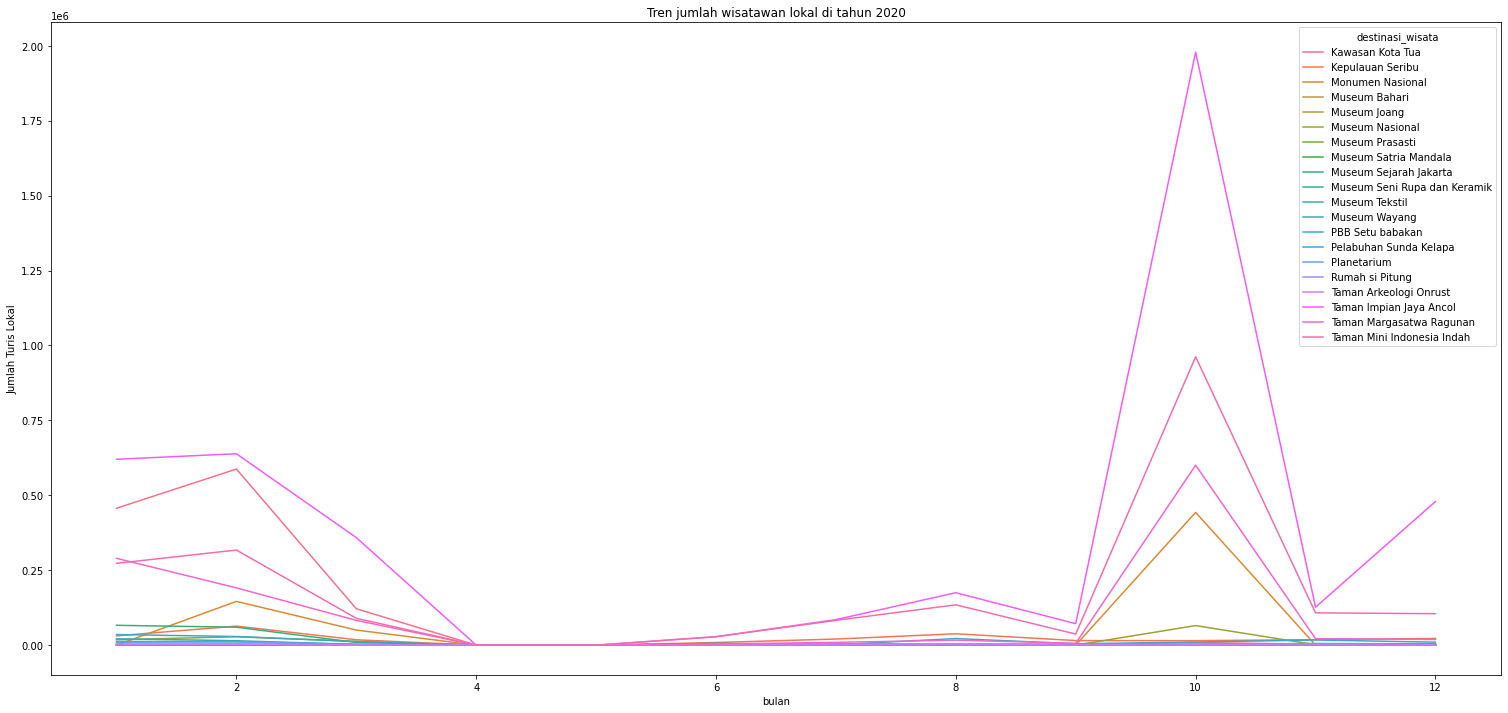

In [78]:
plt.figure(figsize=(26, 12))
sns.color_palette("bright")
sns.lineplot(data=local_groupby_df, x='bulan', y='jumlah', hue='destinasi_wisata')
plt.title('Tren jumlah wisatawan lokal di tahun 2020')
plt.ylabel('Jumlah Turis Lokal')
plt.show()
# [no_kotatua['destinasi_wisata'] == 'Kepulauan Seribu']

Seperti berita yang telah diceritakan sebelumnya [link](https://travel.detik.com/travel-news/d-4989892/efek-virus-corona-ke-wisata-ri-per-24-april-2020), berita tersebut cocok dengan chart yang telah divisualisasikan di atas, bahwa pada bulan April dan Mei, jumlah turis di tempat-tempat wisata di Indonesia berjumlah 0, yakni sesuai  dengan larangan Pemerintah untuk mengunjungi tempat wisata demi mencegah penyebaran virus Covid-19